In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/premature/Prematures.xlsx


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, train_test_split, KFold 
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.metrics import mean_squared_error, r2_score
import xgboost
# Import module

from sklearn.metrics import explained_variance_score

In [3]:
data = pd.read_excel('../input/premature/Prematures.xlsx')
data.head()

/opt/conda/lib/python3.7/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,GEST,DILATE,EFFACE,CONSIS,CONTR,MEMBRAN,AGE,STRAT,GRAVID,PARIT,DIAB,TRANSF,GEMEL,PREMATURE
0,31,3,100,3,1,2,26,3,1,0.0,2,2,1,positif
1,28,8,0,3,1,2,25,3,1,0.0,2,1,2,positif
2,31,3,100,3,2,2,28,3,2,0.0,2,1,1,positif
3,27,2,75,3,2,2,27,2,2,1.0,2,1,2,positif
4,28,6,75,3,2,2,17,3,1,0.0,2,1,1,positif


In [4]:
data.describe()

,GEST,DILATE,EFFACE,CONSIS,CONTR,MEMBRAN,AGE,STRAT,GRAVID,PARIT,DIAB,TRANSF,GEMEL
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000
mean,30.302564,1.241026,43.979487,2.392308,1.094872,1.802564,26.341026,3.225641,2.302564,0.779487,2.025641,1.517949,1.100000
std,3.145281,1.307821,34.829435,0.722351,0.310443,0.480460,5.150098,0.814622,1.450377,1.007728,0.636797,0.500320,0.300385
min,20.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,28.000000,0.000000,0.000000,2.000000,1.000000,2.000000,23.000000,3.000000,1.000000,0.000000,2.000000,1.000000,1.000000
50%,31.000000,1.000000,50.000000,3.000000,1.000000,2.000000,26.000000,3.000000,2.000000,1.000000,2.000000,2.000000,1.000000
75%,33.000000,2.000000,75.000000,3.000000,1.000000,2.000000,30.000000,4.000000,3.000000,1.000000,2.000000,2.000000,1.000000
max,35.000000,8.000000,100.000000,3.000000,3.000000,3.000000,42.000000,4.000000,13.000000,7.000000,9.000000,2.000000,2.000000


In [5]:
diab_outlier=data.index[data['DIAB'] == 9].tolist()
diab_outlier

[38, 294, 336]

In [6]:
data=data.drop(diab_outlier,axis=0)

data

,GEST,DILATE,EFFACE,CONSIS,CONTR,MEMBRAN,AGE,STRAT,GRAVID,PARIT,DIAB,TRANSF,GEMEL,PREMATURE
0,31,3,100,3,1,2,26,3,1,0.0,2,2,1,positif
1,28,8,0,3,1,2,25,3,1,0.0,2,1,2,positif
2,31,3,100,3,2,2,28,3,2,0.0,2,1,1,positif
3,27,2,75,3,2,2,27,2,2,1.0,2,1,2,positif
4,28,6,75,3,2,2,17,3,1,0.0,2,1,1,positif
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,34,3,75,3,1,1,28,4,3,2.0,2,1,1,positif
386,31,0,0,1,1,1,35,3,2,1.0,2,1,1,positif
387,31,2,100,3,1,2,26,3,1,0.0,2,1,2,positif
388,29,0,0,1,1,3,19,3,1,0.0,2,1,1,positif


In [7]:
data=data.dropna()

In [8]:
data=data.reset_index()
data=data.drop(['index'],axis=1)
data

,GEST,DILATE,EFFACE,CONSIS,CONTR,MEMBRAN,AGE,STRAT,GRAVID,PARIT,DIAB,TRANSF,GEMEL,PREMATURE
0,31,3,100,3,1,2,26,3,1,0.0,2,2,1,positif
1,28,8,0,3,1,2,25,3,1,0.0,2,1,2,positif
2,31,3,100,3,2,2,28,3,2,0.0,2,1,1,positif
3,27,2,75,3,2,2,27,2,2,1.0,2,1,2,positif
4,28,6,75,3,2,2,17,3,1,0.0,2,1,1,positif
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,34,3,75,3,1,1,28,4,3,2.0,2,1,1,positif
383,31,0,0,1,1,1,35,3,2,1.0,2,1,1,positif
384,31,2,100,3,1,2,26,3,1,0.0,2,1,2,positif
385,29,0,0,1,1,3,19,3,1,0.0,2,1,1,positif


In [9]:
data.describe()

,GEST,DILATE,EFFACE,CONSIS,CONTR,MEMBRAN,AGE,STRAT,GRAVID,PARIT,DIAB,TRANSF,GEMEL
count,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000
mean,30.312661,1.248062,44.294574,2.397933,1.095607,1.803618,26.312661,3.227390,2.304910,0.777778,1.971576,1.519380,1.100775
std,3.147977,1.309774,34.776504,0.717506,0.311534,0.480379,5.135261,0.814362,1.455756,1.011449,0.166395,0.500271,0.301421
min,20.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,28.000000,0.000000,0.000000,2.000000,1.000000,2.000000,23.000000,3.000000,1.000000,0.000000,2.000000,1.000000,1.000000
50%,31.000000,1.000000,50.000000,3.000000,1.000000,2.000000,26.000000,3.000000,2.000000,1.000000,2.000000,2.000000,1.000000
75%,33.000000,2.000000,75.000000,3.000000,1.000000,2.000000,30.000000,4.000000,3.000000,1.000000,2.000000,2.000000,1.000000
max,35.000000,8.000000,100.000000,3.000000,3.000000,3.000000,42.000000,4.000000,13.000000,7.000000,2.000000,2.000000,2.000000


In [10]:
data.isna().sum()

GEST         0
DILATE       0
EFFACE       0
CONSIS       0
CONTR        0
MEMBRAN      0
AGE          0
STRAT        0
GRAVID       0
PARIT        0
DIAB         0
TRANSF       0
GEMEL        0
PREMATURE    0
dtype: int64

In [11]:
data.dropna()

,GEST,DILATE,EFFACE,CONSIS,CONTR,MEMBRAN,AGE,STRAT,GRAVID,PARIT,DIAB,TRANSF,GEMEL,PREMATURE
0,31,3,100,3,1,2,26,3,1,0.0,2,2,1,positif
1,28,8,0,3,1,2,25,3,1,0.0,2,1,2,positif
2,31,3,100,3,2,2,28,3,2,0.0,2,1,1,positif
3,27,2,75,3,2,2,27,2,2,1.0,2,1,2,positif
4,28,6,75,3,2,2,17,3,1,0.0,2,1,1,positif
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,34,3,75,3,1,1,28,4,3,2.0,2,1,1,positif
383,31,0,0,1,1,1,35,3,2,1.0,2,1,1,positif
384,31,2,100,3,1,2,26,3,1,0.0,2,1,2,positif
385,29,0,0,1,1,3,19,3,1,0.0,2,1,1,positif


In [12]:
gravid_0=data.index[data['GRAVID']==0].tolist()
gravid_0


[329]

In [13]:
data=data.drop(gravid_0,axis=0)
data

,GEST,DILATE,EFFACE,CONSIS,CONTR,MEMBRAN,AGE,STRAT,GRAVID,PARIT,DIAB,TRANSF,GEMEL,PREMATURE
0,31,3,100,3,1,2,26,3,1,0.0,2,2,1,positif
1,28,8,0,3,1,2,25,3,1,0.0,2,1,2,positif
2,31,3,100,3,2,2,28,3,2,0.0,2,1,1,positif
3,27,2,75,3,2,2,27,2,2,1.0,2,1,2,positif
4,28,6,75,3,2,2,17,3,1,0.0,2,1,1,positif
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,34,3,75,3,1,1,28,4,3,2.0,2,1,1,positif
383,31,0,0,1,1,1,35,3,2,1.0,2,1,1,positif
384,31,2,100,3,1,2,26,3,1,0.0,2,1,2,positif
385,29,0,0,1,1,3,19,3,1,0.0,2,1,1,positif


In [14]:
data.dtypes

GEST           int64
DILATE         int64
EFFACE         int64
CONSIS         int64
CONTR          int64
MEMBRAN        int64
AGE            int64
STRAT          int64
GRAVID         int64
PARIT        float64
DIAB           int64
TRANSF         int64
GEMEL          int64
PREMATURE     object
dtype: object

In [15]:
from sklearn.preprocessing import LabelEncoder
print('Categorical columns: ')
for col in data.columns:
    if data[col].dtype == 'object':
        values = data[col].value_counts()
        values = dict(values)
        
        print(str(col))
        label = LabelEncoder()
        label = label.fit(data[col])
        data[col] = label.transform(data[col].astype(str))
        
        new_values = data[col].value_counts()
        new_values = dict(new_values)
        
        value_dict = {}
        i=0
        for key in values:
            value_dict[key] = list(new_values)[i]
            i+= 1
        print(value_dict)

Categorical columns: 
PREMATURE
{'positif': 1, 'negatif': 0}


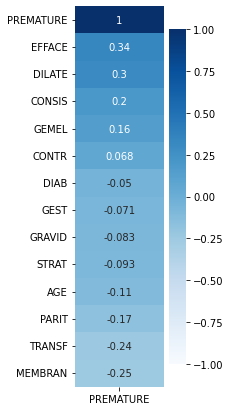

In [16]:
plt.figure(figsize=(2, 7))
heatmap = sns.heatmap(data.corr()[['PREMATURE']]
                      .sort_values(by='PREMATURE', ascending=False),
                      vmin=-1, vmax=1, annot=True, cmap='Blues')

<AxesSubplot:>

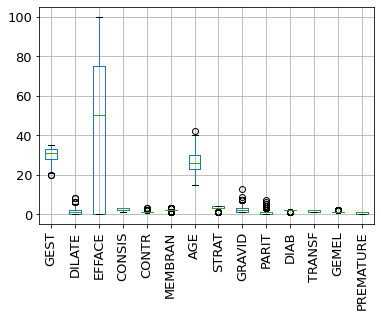

In [17]:
data.boxplot(grid=True, rot=90, fontsize=13)

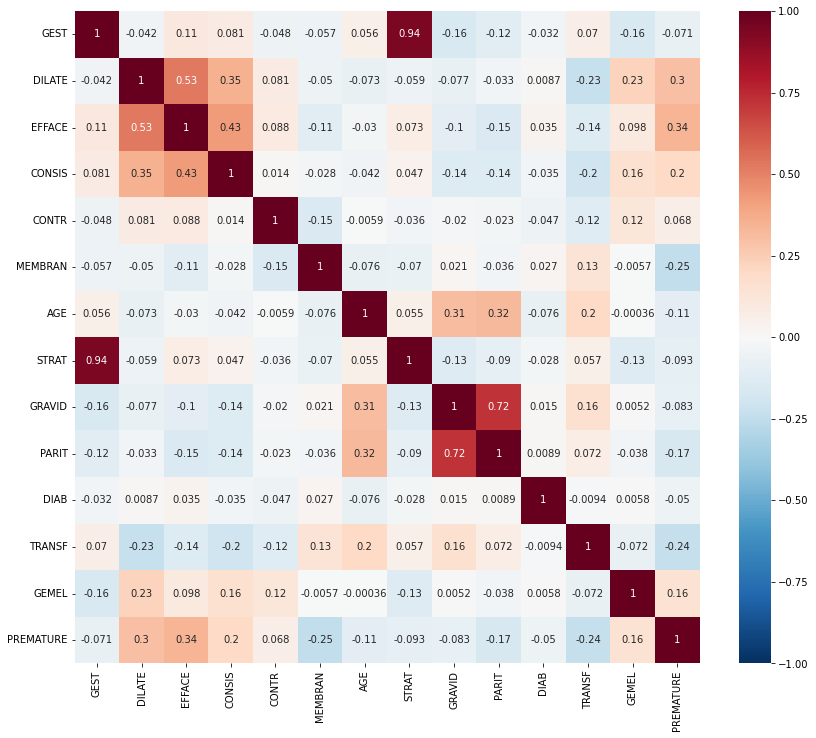

In [18]:
correlation = data.corr()
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

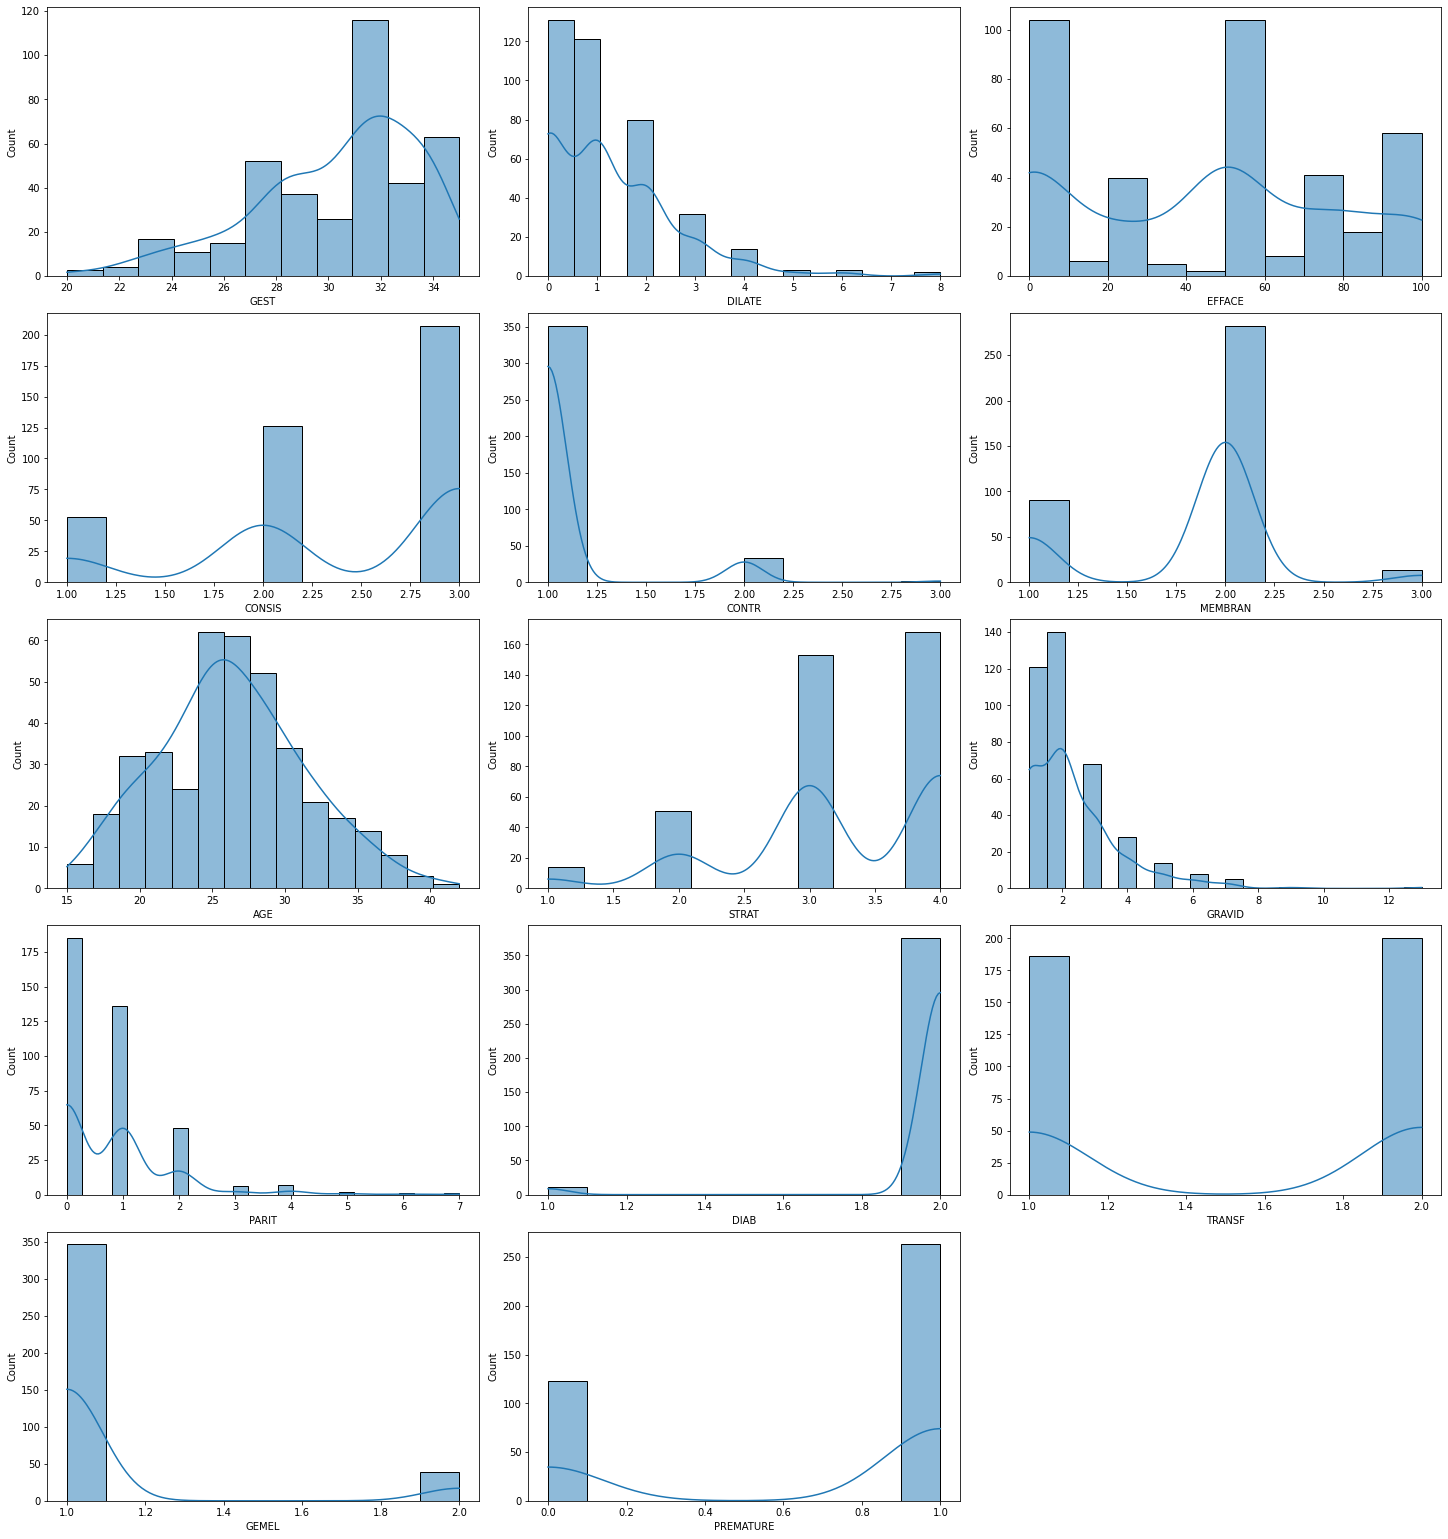

In [19]:
# Graph each variable's distribution
fig = plt.figure(figsize=(20, 25), constrained_layout=True)
for i in range(len(data.columns)):
    plt.subplot(6, 3, i+1)
    sns.histplot(data=data, x=data[data.columns[i]], kde=True)

In [20]:
df=pd.DataFrame(data)

In [21]:
#Séparer les variables explicatives X/Classe y
X =  df.drop(['PREMATURE'], axis=1)
y = df['PREMATURE']
#Diviser les données (80% Apprentissage et 20% Test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Text(0, 0.5, 'Erreur')

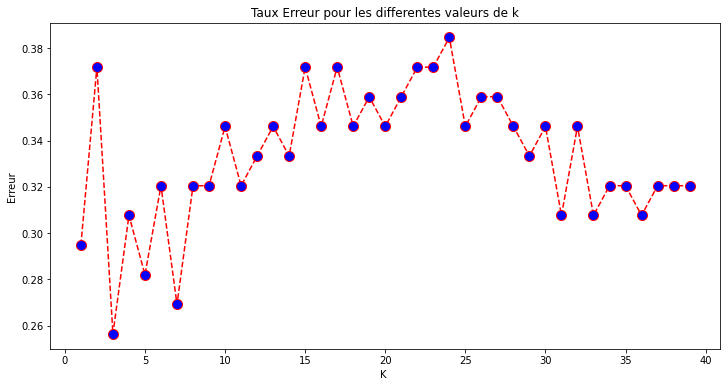

In [22]:
from sklearn.neighbors import KNeighborsClassifier

error = []
# Calculer l'erreur pour k entre 1 et 40 
#Pour chaque itération, l'erreur moyenne pour les valeurs prédites 
#de l'ensemble de test est calculée et sauvegardée ds la liste Erreur.
# Tester k de 1 à 40 et la distance Manhattan
for i in range(1, 40):
    knn = KNeighborsClassifier(i,metric='manhattan')
    knn_model = knn.fit(X_train, y_train)
    pred_i = knn_model.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K ')
plt.ylabel('Erreur')

In [23]:
from sklearn.model_selection import GridSearchCV
leaf_size = list(range(1,20))# Par défaut c'est 30
n_neighbors = list(range(1,25))
p=[1,2] #p = 1 manhattan_distance/p=2 euclidean_distance
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10, n_jobs=-1)
#n_jobs: number of CPU'sfor execution.
#cv: number of folds of the cross validation

#Fit the model
best_model = clf.fit(X_train, y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 5
Best p: 1
Best n_neighbors: 14


In [24]:
best_parameters = clf.best_params_
print(best_parameters)

{'leaf_size': 5, 'n_neighbors': 14, 'p': 1}


In [25]:
best_result = clf.best_score_
print(best_result)

0.7366666666666666


Tried different values on the best knn params, the best ones test wise seem like 
{'leaf_size': 5, 'n_neighbors': 9, 'p': 1} cuz they give us the highest value on the test set.

In [26]:
knn = KNeighborsClassifier(9,p=1,leaf_size=5)
knn_model = knn.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [27]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.74
Accuracy of K-NN classifier on test set: 0.71


In [28]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_knn))

[[11  8]
 [15 44]]
